## 1. Data Visualization 
### full dataset

emotion
neutral      6717
happiness    5309
HAPPINESS     387
surprise      356
anger         228
DISGUST       195
NEUTRAL       151
SADNESS       144
sadness       124
ANGER          24
disgust        13
fear           13
SURPRISE       12
contempt        9
FEAR            8
Name: count, dtype: int64


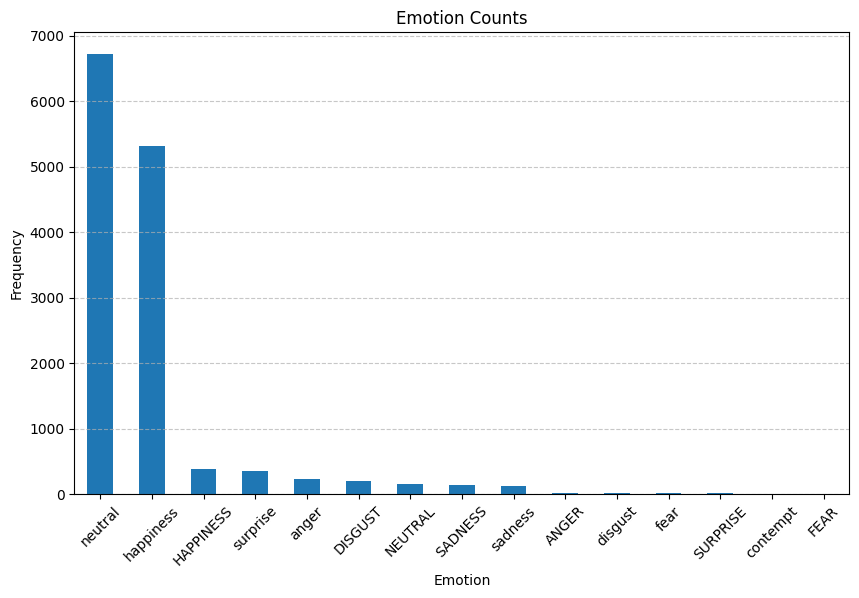

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('data\\legend.csv')

emotion_counts = df['emotion'].value_counts()

print(emotion_counts)

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 500_Pics

emotion
happiness    197
anger        115
neutral       84
fear          54
sad           50
Name: count, dtype: int64


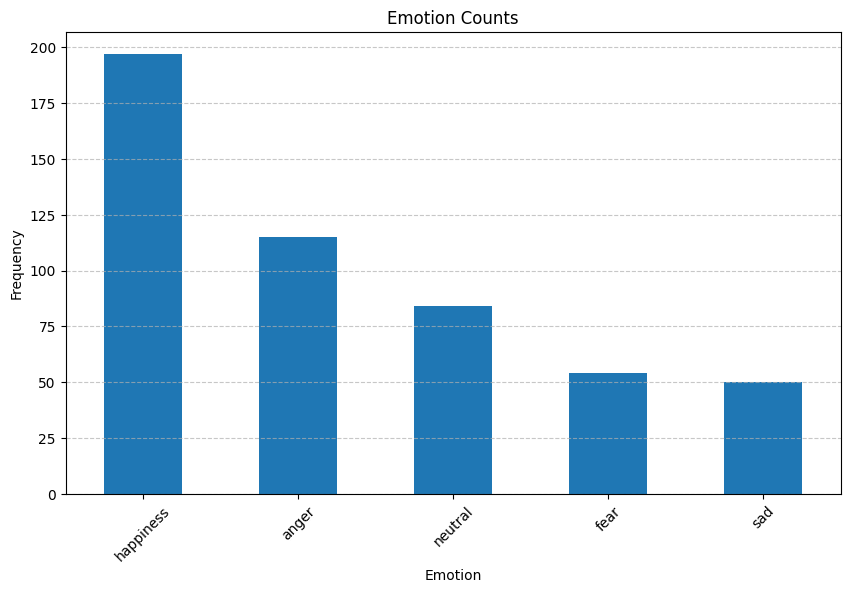

In [13]:
df = pd.read_csv('data\\500_picts_satz.csv')

emotion_counts = df['emotion'].value_counts()

print(emotion_counts)

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Emotion Counts')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Train the model

In [14]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Path
csv_file = 'data/500_picts_satz.csv' 
image_dir = 'images/'         

#Read
data = pd.read_csv(csv_file, header=None, names=['user_id', 'image', 'emotion'])

# resize the dataset (I didnt find the resolution of this dataset, so i will resize them to 224x224)
image_size = (224, 224) 
images = []
labels = []
for _, row in data.iterrows():
    image_path = os.path.join(image_dir, row['image'])
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.resize(img, image_size) / 255.0  
        images.append(img)
        labels.append(row['emotion'])

#convert to numpy arrays
images = np.array(images)
labels = pd.get_dummies(labels).values  

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# CNN model(it is a demo, more evaluation and fine tune is needed)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(labels.shape[1], activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)




Epoch 1/10


c:\Users\Eric\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.2440 - loss: 3.3325 - val_accuracy: 0.3125 - val_loss: 1.5565
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.4072 - loss: 1.4734 - val_accuracy: 0.3125 - val_loss: 1.5581
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.3801 - loss: 1.5090 - val_accuracy: 0.3125 - val_loss: 1.5633
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.4018 - loss: 1.4865 - val_accuracy: 0.3125 - val_loss: 1.5598
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.3702 - loss: 1.4633 - val_accuracy: 0.3125 - val_loss: 1.5552
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.3945 - loss: 1.4727 - val_accuracy: 0.3250 - val_loss: 1.5222
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.4017 - loss: 1.3946 - val_accuracy: 0.3375 - val_loss: 1.5422
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step - accuracy: 0.4914 - loss: 1.3006 - val_accuracy: 0.4000 - val_

# Visulize the performance